In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd 'gdrive/MyDrive'

/content/gdrive/MyDrive


In [3]:
!ls 'FYP Dataset'

DDoS1.csv  DoS1.csv   Idle2.csv  Idle6.csv     Working2.csv  Working6.csv
DDoS2.csv  DoS2.csv   Idle3.csv  Idle7.csv     Working3.csv  Working7.csv
DDoS3.csv  file.csv   Idle4.csv  Idle8.csv     Working4.csv  Working8.csv
DDoS4.csv  Idle1.csv  Idle5.csv  Working1.csv  Working5.csv  Working9.csv


In [4]:
import pandas as pd

In [5]:
attack=pd.read_csv('FYP Dataset/DDoS1.csv')
attack = attack.sample(frac = 1)
print(len(attack))
attack=attack[:150]
working=pd.read_csv('FYP Dataset/Working1.csv')
working = working.sample(frac = 1)
print(len(working))
working=working[:3000]
idle=pd.read_csv('FYP Dataset/Idle1.csv')
idle = idle.sample(frac = 1)
print(len(idle))
idle=idle[:1850]

10788
3042
4444


In [6]:
import numpy as np
import matplotlib.pyplot as plt

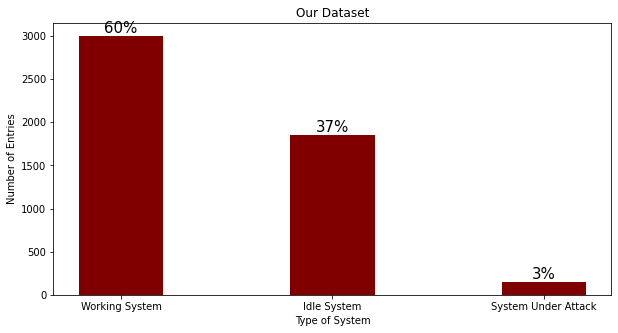

In [7]:
data={'Working System': len(working), 'Idle System': len(idle), 'System Under Attack': len(attack)}
typeOfSystem= list(data.keys())
NumberOfEntries=list(data.values())
fig = plt.figure(figsize = (10, 5))
total=len(working)+len(idle)+len(attack)
graph=plt.bar(typeOfSystem, NumberOfEntries, color ='maroon',
        width = 0.4)
for bar in graph:
    height = bar.get_height()
    percent=height*100/total
    plt.annotate( "{}%".format(int(percent)),(bar.get_x() + bar.get_width()/2, height+.05),ha="center",va="bottom",fontsize=15)
 
plt.xlabel("Type of System")
plt.ylabel("Number of Entries")
plt.title("Our Dataset")
plt.show()

In [8]:
idle["Attack"] = -1
working["Attack"] = -1
attack["Attack"] = 1

In [9]:
ls=[working,idle,attack]
dataset_train=pd.concat(ls)

In [10]:
len(dataset_train)

5000

In [11]:
dataset_train.head()

,Protocol,Local Address,Remote Address,Local Port,Remote Port,Local Host,Remote Host,Service Name,Packets,Data Size,Total Size,Data Speed,Capture Time,Last Packet Time,Duration,Attack
2247,TCP,192.168.29.50,5.62.53.230,52323.0,443.0,Sumedha,ipm-provider.ns1.ff.avast.com,https,43,"23,350 Bytes","25,645 Bytes",0.1 KB/Sec,12/10/2022 9:45:34 AM:741,12/10/2022 9:48:10 AM:448,02:35.7,-1
740,TCP,192.168.29.50,66.225.223.159,55468.0,443.0,Sumedha,NaN,https,20,"7,008 Bytes","8,365 Bytes",1.4 KB/Sec,12/10/2022 8:39:48 AM:388,12/10/2022 8:39:53 AM:245,00:04.9,-1
1368,TCP,192.168.29.50,162.159.128.232,54224.0,443.0,Sumedha,NaN,https,185,"94,719 Bytes","102,338 Bytes",0.6 KB/Sec,12/10/2022 9:01:40 AM:371,12/10/2022 9:04:23 AM:911,02:43.5,-1
2998,TCP,192.168.29.50,199.115.119.227,49375.0,443.0,Sumedha,NaN,https,17,"3,428 Bytes","4,665 Bytes",0.6 KB/Sec,12/10/2022 10:48:38 AM:038,12/10/2022 10:48:43 AM:877,00:05.8,-1
183,TCP,192.168.29.50,67.199.150.86,63589.0,443.0,Sumedha,NaN,https,33,"9,644 Bytes","11,521 Bytes",2.9 KB/Sec,12/10/2022 8:36:04 AM:078,12/10/2022 8:36:07 AM:333,00:03.3,-1


In [12]:
dataset_train = dataset_train.drop(["Local Host","Remote Host","Service Name","Capture Time","Last Packet Time"],axis=1)
dataset_train = dataset_train.reset_index(drop = True)
dataset_train.head()

,Protocol,Local Address,Remote Address,Local Port,Remote Port,Packets,Data Size,Total Size,Data Speed,Duration,Attack
0,TCP,192.168.29.50,5.62.53.230,52323.0,443.0,43,"23,350 Bytes","25,645 Bytes",0.1 KB/Sec,02:35.7,-1
1,TCP,192.168.29.50,66.225.223.159,55468.0,443.0,20,"7,008 Bytes","8,365 Bytes",1.4 KB/Sec,00:04.9,-1
2,TCP,192.168.29.50,162.159.128.232,54224.0,443.0,185,"94,719 Bytes","102,338 Bytes",0.6 KB/Sec,02:43.5,-1
3,TCP,192.168.29.50,199.115.119.227,49375.0,443.0,17,"3,428 Bytes","4,665 Bytes",0.6 KB/Sec,00:05.8,-1
4,TCP,192.168.29.50,67.199.150.86,63589.0,443.0,33,"9,644 Bytes","11,521 Bytes",2.9 KB/Sec,00:03.3,-1


In [13]:
dataset_train['Throughput']=0
dataset_train["Duration in seconds"] = 0

In [14]:
import string
from datetime import datetime
for i in range(len(dataset_train)):
  t = datetime.strptime(dataset_train["Duration"][i].split('.')[0], '%M:%S').time()
  dataset_train["Duration in seconds"][i] = t.hour*3600 + t.minute*60 + t.second
  
  if(type(dataset_train["Packets"][i])==int or type(dataset_train["Packets"][i])==float):
    dataset_train["Packets"][i] = dataset_train["Packets"][i]
  else:
    if(type(dataset_train["Packets"][i])==str):
      dataset_train["Packets"][i] = dataset_train["Packets"][i].translate(str.maketrans('', '', string.punctuation))
      dataset_train["Packets"][i] = int(dataset_train["Packets"][i].split(' ')[0])
      dataset_train["Packets"][i] = int(dataset_train["Packets"][i])

<ipython-input-14-22298153ade2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_train["Duration in seconds"][i] = t.hour*3600 + t.minute*60 + t.second
<ipython-input-14-22298153ade2>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_train["Packets"][i] = dataset_train["Packets"][i].translate(str.maketrans('', '', string.punctuation))
<ipython-input-14-22298153ade2>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data

In [15]:
dataset_train.head()

,Protocol,Local Address,Remote Address,Local Port,Remote Port,Packets,Data Size,Total Size,Data Speed,Duration,Attack,Throughput,Duration in seconds
0,TCP,192.168.29.50,5.62.53.230,52323.0,443.0,43,"23,350 Bytes","25,645 Bytes",0.1 KB/Sec,02:35.7,-1,0,155
1,TCP,192.168.29.50,66.225.223.159,55468.0,443.0,20,"7,008 Bytes","8,365 Bytes",1.4 KB/Sec,00:04.9,-1,0,4
2,TCP,192.168.29.50,162.159.128.232,54224.0,443.0,185,"94,719 Bytes","102,338 Bytes",0.6 KB/Sec,02:43.5,-1,0,163
3,TCP,192.168.29.50,199.115.119.227,49375.0,443.0,17,"3,428 Bytes","4,665 Bytes",0.6 KB/Sec,00:05.8,-1,0,5
4,TCP,192.168.29.50,67.199.150.86,63589.0,443.0,33,"9,644 Bytes","11,521 Bytes",2.9 KB/Sec,00:03.3,-1,0,3


In [16]:
for i in range(len(dataset_train)):
  val = dataset_train["Packets"][i]/dataset_train["Duration in seconds"][i]
  if val==np.inf or val==-np.inf:
    val = 10**15
  dataset_train["Throughput"][i] = val

<ipython-input-16-ad44b00ee02e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_train["Throughput"][i] = val
<ipython-input-16-ad44b00ee02e>:2: RuntimeWarning: divide by zero encountered in long_scalars
  val = dataset_train["Packets"][i]/dataset_train["Duration in seconds"][i]


In [17]:
dataset_train=dataset_train.sort_values(by=['Throughput'])

In [18]:
throughput=dataset_train['Throughput']

In [19]:
throughput.replace([np.inf, -np.inf], np.nan, inplace=True)
throughput.dropna(how="all", inplace=True)

In [20]:
stdev = throughput.std()
mean = throughput.mean()
print(mean,stdev)

28200000000011.516 165560387920568.22


In [21]:
data=dataset_train["Throughput"].tolist()

In [22]:
c=0
for i in dataset_train['Throughput']:
  if i==1000000000000000:
    c=c+1

print(c)

141


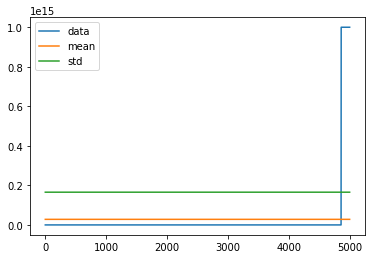

In [23]:
df = pd.DataFrame({
      'data': data,
      'mean': [mean for i in range(len(data))],
      'std': [stdev for i in range(len(data))]})
df.plot()
plt.show()

In [24]:
dataset_train["Anomaly"] = 1
dataset_train.replace(np.nan,np.inf,inplace=True)
for i in range(0,len(dataset_train["Total Size"])):
    if(abs(dataset_train["Throughput"][i]-mean)<stdev):
        dataset_train["Anomaly"][i] = -1   

<ipython-input-24-5d4597eb4d8d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_train["Anomaly"][i] = -1


In [25]:
from sklearn.metrics import confusion_matrix,precision_score,accuracy_score,f1_score, classification_report
import seaborn as sn
tn, fp, fn, tp = confusion_matrix(dataset_train["Attack"], dataset_train["Anomaly"]).ravel()
precision = precision_score(dataset_train["Attack"], dataset_train["Anomaly"])
accuracy = accuracy_score(dataset_train["Attack"], dataset_train["Anomaly"])
f1_score = f1_score(dataset_train["Attack"], dataset_train["Anomaly"])

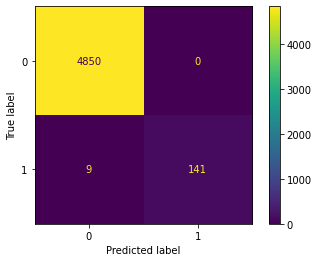

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay
cm=confusion_matrix(dataset_train["Attack"], dataset_train["Anomaly"])
disp_poly = ConfusionMatrixDisplay(cm)
disp_poly.plot()
plt.show()

In [27]:
(tn, fp, fn, tp),precision,accuracy,f1_score

((4850, 0, 9, 141), 1.0, 0.9982, 0.9690721649484536)

## Testing

In [28]:
attack=pd.read_csv('FYP Dataset/DDoS1.csv')
attack=attack.append(pd.read_csv('FYP Dataset/DDoS2.csv'))
attack=attack.append(pd.read_csv('FYP Dataset/DDoS3.csv'))
attack=attack.append(pd.read_csv('FYP Dataset/DDoS4.csv'))
attack = attack.sample(frac = 1)
print(len(attack))
attack=attack[:1000]
print(len(attack))

64993
1000


In [29]:
working=pd.read_csv('FYP Dataset/Working1.csv')
working=working.append(pd.read_csv('FYP Dataset/Working2.csv'))
working=working.append(pd.read_csv('FYP Dataset/Working3.csv'))
working=working.append(pd.read_csv('FYP Dataset/Working4.csv'))
working=working.append(pd.read_csv('FYP Dataset/Working5.csv'))
working=working.append(pd.read_csv('FYP Dataset/Working6.csv'))
working=working.append(pd.read_csv('FYP Dataset/Working7.csv'))
working=working.append(pd.read_csv('FYP Dataset/Working8.csv'))
working=working.append(pd.read_csv('FYP Dataset/Working9.csv'))
working = working.sample(frac = 1)
print(len(working))
#working=working[:7000]
#print(len(working))

14897


In [30]:
idle=pd.read_csv('FYP Dataset/Idle1.csv')
idle=idle.append(pd.read_csv('FYP Dataset/Idle2.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle3.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle4.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle5.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle6.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle7.csv'))
idle=idle.append(pd.read_csv('FYP Dataset/Idle8.csv'))
idle = idle.sample(frac = 1)
print(len(idle))
#idle=idle[:7400]
# print(len(idle))

11032


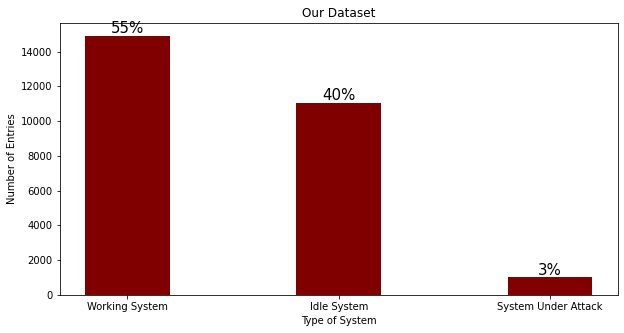

In [31]:
data={'Working System': len(working), 'Idle System': len(idle), 'System Under Attack': len(attack)}
typeOfSystem= list(data.keys())
NumberOfEntries=list(data.values())
fig = plt.figure(figsize = (10, 5))
total=len(working)+len(idle)+len(attack)
graph=plt.bar(typeOfSystem, NumberOfEntries, color ='maroon',
        width = 0.4)
for bar in graph:
    height = bar.get_height()
    percent=height*100/total
    plt.annotate( "{}%".format(int(percent)),(bar.get_x() + bar.get_width()/2, height+.05),ha="center",va="bottom",fontsize=15)
 
plt.xlabel("Type of System")
plt.ylabel("Number of Entries")
plt.title("Our Dataset")
plt.show()

In [32]:
idle["Attack"] = -1
working["Attack"] = -1
attack["Attack"] = 1

In [33]:
ls=[working,idle,attack]
dataset_test=pd.concat(ls)

In [34]:
len(dataset_test)

26929

In [35]:
dataset_test.head()

,Protocol,Local Address,Remote Address,Local Port,Remote Port,Local Host,Remote Host,Service Name,Packets,Data Size,Total Size,Data Speed,Capture Time,Last Packet Time,Duration,Attack
542,UDP,10.0.2.15,192.168.0.1,50302.0,53.0,NaN,NaN,domain,4,712 Bytes,885 Bytes,NaN,10/25/2022 9:34:06 AM:858,10/25/2022 9:34:08 AM:555,00:01.7,-1
595,TCP,192.168.137.188,23.44.10.9,53779.0,443.0,NaN,e35862.dscj.akamaiedge.net,https,75,"54,451 Bytes","58,071 Bytes",1.5 KB/Sec,11/12/2022 1:01:48 AM:583,11/12/2022 1:02:23 AM:720,00:35.1,-1
81,UDP,192.168.137.84,239.255.255.250,49923.0,1900.0,LAPTOP-54PG1OGH.mshome.net,NaN,ssdp,8,"1,400 Bytes","1,827 Bytes",0.5 KB/Sec,11/7/2022 4:45:01 PM:783,11/7/2022 4:45:04 PM:803,00:03.0,-1
642,TCP,192.168.29.50,35.197.154.200,52942.0,443.0,NaN,rest.gti.mcafee.akadns.net,https,51,"27,630 Bytes","30,247 Bytes",4.0 KB/Sec,12/14/2022 10:05:07 AM:404,12/14/2022 10:05:14 AM:066,00:06.7,-1
331,UDP,192.168.29.50,239.255.255.250,59248.0,1900.0,Sumedha,NaN,ssdp,8,"1,392 Bytes","1,818 Bytes",0.5 KB/Sec,12/14/2022 5:59:26 PM:766,12/14/2022 5:59:29 PM:796,00:03.0,-1


In [36]:
dataset_test = dataset_test.drop(["Local Host","Remote Host","Service Name","Capture Time","Last Packet Time"],axis=1)
dataset_test = dataset_test.reset_index(drop = True)
dataset_test.head()

,Protocol,Local Address,Remote Address,Local Port,Remote Port,Packets,Data Size,Total Size,Data Speed,Duration,Attack
0,UDP,10.0.2.15,192.168.0.1,50302.0,53.0,4,712 Bytes,885 Bytes,NaN,00:01.7,-1
1,TCP,192.168.137.188,23.44.10.9,53779.0,443.0,75,"54,451 Bytes","58,071 Bytes",1.5 KB/Sec,00:35.1,-1
2,UDP,192.168.137.84,239.255.255.250,49923.0,1900.0,8,"1,400 Bytes","1,827 Bytes",0.5 KB/Sec,00:03.0,-1
3,TCP,192.168.29.50,35.197.154.200,52942.0,443.0,51,"27,630 Bytes","30,247 Bytes",4.0 KB/Sec,00:06.7,-1
4,UDP,192.168.29.50,239.255.255.250,59248.0,1900.0,8,"1,392 Bytes","1,818 Bytes",0.5 KB/Sec,00:03.0,-1


In [37]:
dataset_test['Throughput']=0

In [38]:
dataset_test["Duration in seconds"] = 0

In [39]:
import string
from datetime import datetime
for i in range(len(dataset_test)):
  t = datetime.strptime(dataset_test["Duration"][i].split('.')[0], '%M:%S').time()
  dataset_test["Duration in seconds"][i] = t.hour*3600 + t.minute*60 + t.second
  
  if(type(dataset_test["Packets"][i])==int or type(dataset_test["Packets"][i])==float):
    dataset_test["Packets"][i] = dataset_test["Packets"][i]
  else:
    if(type(dataset_test["Packets"][i])==str):
      dataset_test["Packets"][i] = dataset_test["Packets"][i].translate(str.maketrans('', '', string.punctuation))
      dataset_test["Packets"][i] = int(dataset_test["Packets"][i].split(' ')[0])
      dataset_test["Packets"][i] = int(dataset_test["Packets"][i])

<ipython-input-39-ee91ebca76a1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_test["Duration in seconds"][i] = t.hour*3600 + t.minute*60 + t.second
<ipython-input-39-ee91ebca76a1>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_test["Packets"][i] = dataset_test["Packets"][i].translate(str.maketrans('', '', string.punctuation))
<ipython-input-39-ee91ebca76a1>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset

In [40]:
dataset_test.head()

,Protocol,Local Address,Remote Address,Local Port,Remote Port,Packets,Data Size,Total Size,Data Speed,Duration,Attack,Throughput,Duration in seconds
0,UDP,10.0.2.15,192.168.0.1,50302.0,53.0,4,712 Bytes,885 Bytes,NaN,00:01.7,-1,0,1
1,TCP,192.168.137.188,23.44.10.9,53779.0,443.0,75,"54,451 Bytes","58,071 Bytes",1.5 KB/Sec,00:35.1,-1,0,35
2,UDP,192.168.137.84,239.255.255.250,49923.0,1900.0,8,"1,400 Bytes","1,827 Bytes",0.5 KB/Sec,00:03.0,-1,0,3
3,TCP,192.168.29.50,35.197.154.200,52942.0,443.0,51,"27,630 Bytes","30,247 Bytes",4.0 KB/Sec,00:06.7,-1,0,6
4,UDP,192.168.29.50,239.255.255.250,59248.0,1900.0,8,"1,392 Bytes","1,818 Bytes",0.5 KB/Sec,00:03.0,-1,0,3


In [41]:
for i in range(len(dataset_test)):
  val = dataset_test["Packets"][i]/dataset_test["Duration in seconds"][i]
  if val==np.inf or val==-np.inf:
    val = 10**15
  dataset_test["Throughput"][i] = val

<ipython-input-41-f3b1ecf7bb72>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_test["Throughput"][i] = val
<ipython-input-41-f3b1ecf7bb72>:2: RuntimeWarning: divide by zero encountered in long_scalars
  val = dataset_test["Packets"][i]/dataset_test["Duration in seconds"][i]


In [42]:
dataset_test

,Protocol,Local Address,Remote Address,Local Port,Remote Port,Packets,Data Size,Total Size,Data Speed,Duration,Attack,Throughput,Duration in seconds
0,UDP,10.0.2.15,192.168.0.1,50302.0,53.0,4,712 Bytes,885 Bytes,NaN,00:01.7,-1,4,1
1,TCP,192.168.137.188,23.44.10.9,53779.0,443.0,75,"54,451 Bytes","58,071 Bytes",1.5 KB/Sec,00:35.1,-1,2,35
2,UDP,192.168.137.84,239.255.255.250,49923.0,1900.0,8,"1,400 Bytes","1,827 Bytes",0.5 KB/Sec,00:03.0,-1,2,3
3,TCP,192.168.29.50,35.197.154.200,52942.0,443.0,51,"27,630 Bytes","30,247 Bytes",4.0 KB/Sec,00:06.7,-1,8,6
4,UDP,192.168.29.50,239.255.255.250,59248.0,1900.0,8,"1,392 Bytes","1,818 Bytes",0.5 KB/Sec,00:03.0,-1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26924,UDP,10.15.13.179,10.0.2.4,56329.0,15551.0,1,"1,472 Bytes","3,000 Bytes",NaN,00:00.0,1,1000000000000000,0
26925,UDP,10.15.13.208,10.0.2.4,58083.0,31040.0,1,"1,472 Bytes","3,000 Bytes",NaN,00:00.0,1,1000000000000000,0
26926,UDP,10.15.9.111,10.0.2.4,55619.0,6592.0,2,"2,944 Bytes","4,500 Bytes",0.0 KB/Sec,01:10.3,1,0,70
26927,UDP,10.15.9.111,10.0.2.4,55619.0,159.0,1,"1,472 Bytes","3,000 Bytes",NaN,00:00.0,1,1000000000000000,0


In [43]:
dataset_test=dataset_test.sort_values(by=['Throughput'])

In [44]:
dataset_test.head()

,Protocol,Local Address,Remote Address,Local Port,Remote Port,Packets,Data Size,Total Size,Data Speed,Duration,Attack,Throughput,Duration in seconds
10142,TCP,192.168.29.50,20.44.229.112,51533.0,443.0,38,"18,855 Bytes","20,602 Bytes",0.2 KB/Sec,01:19.6,-1,0,79
12885,UDP,192.168.29.184,239.255.255.250,42205.0,1900.0,2,633 Bytes,"1,057 Bytes",0.0 KB/Sec,11:00.2,-1,0,660
21657,TCP,192.168.29.50,13.35.238.22,61230.0,443.0,46,"3,044 Bytes","5,501 Bytes",0.0 KB/Sec,04:00.1,-1,0,240
12887,UDP,192.168.29.184,239.255.255.250,37021.0,1900.0,2,641 Bytes,"1,073 Bytes",0.0 KB/Sec,49:59.7,-1,0,2999
21656,UDP,192.168.29.184,239.255.255.250,38628.0,1900.0,2,678 Bytes,"1,100 Bytes",0.0 KB/Sec,53:00.5,-1,0,3180


In [45]:
throughput=dataset_test['Throughput']

In [46]:
throughput.replace([np.inf, -np.inf], np.nan, inplace=True)
throughput.dropna(how="all", inplace=True)

In [47]:
data=dataset_test["Throughput"].tolist()

In [48]:
c=0
for i in dataset_test['Throughput']:
  if i==1000000000000000:
    c=c+1

print(c)

1251


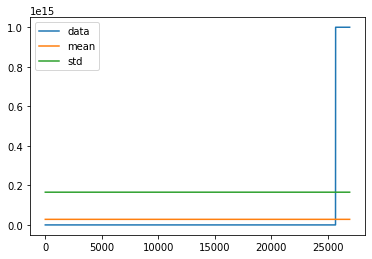

In [49]:
df = pd.DataFrame({
      'data': data,
      'mean': [mean for i in range(len(data))],
      'std': [stdev for i in range(len(data))]})
df.plot()
plt.show()

In [50]:
dataset_test["Anomaly"] = 1
dataset_test.replace(np.nan,np.inf,inplace=True)
for i in range(0,len(dataset_test["Total Size"])):
    if(abs(dataset_test["Throughput"][i]-mean)<stdev):
        dataset_test["Anomaly"][i] = -1   

<ipython-input-50-4caa7296dcdc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_test["Anomaly"][i] = -1


In [51]:
from sklearn.metrics import confusion_matrix,precision_score,accuracy_score,f1_score, classification_report
import seaborn as sn
tn, fp, fn, tp = confusion_matrix(dataset_test["Attack"], dataset_test["Anomaly"]).ravel()
precision = precision_score(dataset_test["Attack"], dataset_test["Anomaly"])
accuracy = accuracy_score(dataset_test["Attack"], dataset_test["Anomaly"])
f1_score = f1_score(dataset_test["Attack"], dataset_test["Anomaly"])

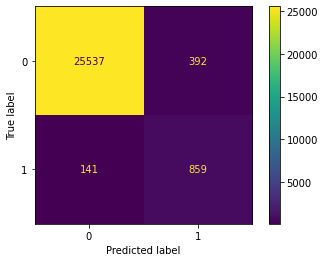

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay
cm=confusion_matrix(dataset_test["Attack"], dataset_test["Anomaly"])
disp_poly = ConfusionMatrixDisplay(cm)
disp_poly.plot()
plt.show()

In [53]:
(tn, fp, fn, tp),precision,accuracy,f1_score

((25537, 392, 141, 859),
 0.6866506794564349,
 0.9802072115563147,
 0.763216348289649)

## Entropy Based

In [54]:
import scipy.stats
def entropy_calc(data):
    p_data = data.value_counts()           
    entropy = scipy.stats.entropy(p_data)  
    return entropy

In [55]:
dataset_test["Entropy Remote Port"] = 0.0
for i in range(0,len(dataset_test)):
  dataset_test["Entropy Remote Port"][i] = entropy_calc(dataset_test["Remote Port"][:i+1])

<ipython-input-55-99b041f0ca6a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_test["Entropy Remote Port"][i] = entropy_calc(dataset_test["Remote Port"][:i+1])


In [56]:
dataset_test.head()

,Protocol,Local Address,Remote Address,Local Port,Remote Port,Packets,Data Size,Total Size,Data Speed,Duration,Attack,Throughput,Duration in seconds,Anomaly,Entropy Remote Port
10142,TCP,192.168.29.50,20.44.229.112,51533.0,443.0,38,"18,855 Bytes","20,602 Bytes",0.2 KB/Sec,01:19.6,-1,0,79,-1,1.131007
12885,UDP,192.168.29.184,239.255.255.250,42205.0,1900.0,2,633 Bytes,"1,057 Bytes",0.0 KB/Sec,11:00.2,-1,0,660,-1,1.190211
21657,TCP,192.168.29.50,13.35.238.22,61230.0,443.0,46,"3,044 Bytes","5,501 Bytes",0.0 KB/Sec,04:00.1,-1,0,240,-1,1.204652
12887,UDP,192.168.29.184,239.255.255.250,37021.0,1900.0,2,641 Bytes,"1,073 Bytes",0.0 KB/Sec,49:59.7,-1,0,2999,-1,1.190330
21656,UDP,192.168.29.184,239.255.255.250,38628.0,1900.0,2,678 Bytes,"1,100 Bytes",0.0 KB/Sec,53:00.5,-1,0,3180,-1,1.204664


In [57]:
dataset_test["Anomaly Remote Port Entropy Based"] = -1
check_port = dataset_test["Entropy Remote Port"][0]
for i in range(0,len(dataset_test)):
    if (dataset_test["Entropy Remote Port"][i]>=check_port) and (dataset_test['Throughput'][i] >mean):
        dataset_test["Anomaly Remote Port Entropy Based"][i] = 1
    check_port=dataset_test["Entropy Remote Port"][i]

<ipython-input-57-d8192ffc375e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_test["Anomaly Remote Port Entropy Based"][i] = 1


In [58]:
dataset_test.to_csv('FYP Dataset/file.csv', header=True, index=False)

In [59]:
from sklearn.metrics import confusion_matrix,precision_score,accuracy_score,f1_score, classification_report
tn, fp, fn, tp = confusion_matrix(dataset_test["Attack"], dataset_test["Anomaly Remote Port Entropy Based"]).ravel()
precision = precision_score(dataset_test["Attack"], dataset_test["Anomaly Remote Port Entropy Based"])
accuracy = accuracy_score(dataset_test["Attack"], dataset_test["Anomaly Remote Port Entropy Based"])
f1_score = f1_score(dataset_test["Attack"], dataset_test["Anomaly Remote Port Entropy Based"])
(tn,fp,fn,tp), precision, accuracy, f1_score

((25878, 51, 216, 784),
 0.9389221556886228,
 0.9900850384344015,
 0.8544959128065396)

In [60]:
dataset_test["Entropy Throughput"] = 0.0
for i in range(0,len(dataset_test)):
  dataset_test["Entropy Throughput"][i] = entropy_calc(dataset_test["Throughput"][:i+1])

<ipython-input-60-8752eabf6d76>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_test["Entropy Throughput"][i] = entropy_calc(dataset_test["Throughput"][:i+1])


In [61]:
dataset_test["Anomaly Throughput Entropy Based"] = -1
check_throughput = dataset_test["Entropy Throughput"][0]
for i in range(0,len(dataset_test)):
    if (dataset_test["Entropy Throughput"][i]>=check_throughput) and (dataset_test['Throughput'][i] >mean):
        dataset_test["Anomaly Throughput Entropy Based"][i] = 1
    check_throughput=dataset_test["Entropy Throughput"][i]

<ipython-input-61-945067488720>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_test["Anomaly Throughput Entropy Based"][i] = 1


In [62]:
from sklearn.metrics import confusion_matrix,precision_score,accuracy_score,f1_score, classification_report
tn, fp, fn, tp = confusion_matrix(dataset_test["Attack"], dataset_test["Anomaly Throughput Entropy Based"]).ravel()
precision = precision_score(dataset_test["Attack"], dataset_test["Anomaly Throughput Entropy Based"])
accuracy = accuracy_score(dataset_test["Attack"], dataset_test["Anomaly Throughput Entropy Based"])
f1_score = f1_score(dataset_test["Attack"], dataset_test["Anomaly Throughput Entropy Based"])
(tn,fp,fn,tp), precision, accuracy, f1_score

((25537, 392, 141, 859),
 0.6866506794564349,
 0.9802072115563147,
 0.763216348289649)